In [0]:
#Importing Libaries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
import sklearn
import matplotlib.pyplot as plt

In [0]:
#Importing datasets
data=pd.read_csv('/content/drive/My Drive/Harsh.csv')
x_data=pd.read_csv('/content/drive/My Drive/final_final2.csv')
commodity=pd.read_csv('/content/drive/My Drive/Commodity.csv')
data.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Lucknow,Banthara,Wheat,Dara,FAQ,1800,1850,1840,30 Sep 2019
1,2,Lucknow,Banthara,Wheat,Dara,FAQ,1800,1850,1840,29 Sep 2019
2,3,Lucknow,Banthara,Wheat,Dara,FAQ,1800,1850,1840,26 Sep 2019
3,4,Lucknow,Banthara,Wheat,Dara,FAQ,1800,1850,1840,25 Sep 2019
4,5,Lucknow,Banthara,Wheat,Dara,FAQ,1800,1850,1840,20 Sep 2019


In [0]:
features=['District Name','Commodity','Min Price (Rs./Quintal)','Max Price (Rs./Quintal)','Price Date']

In [0]:
#Defining Features
features=['District Name','Commodity','Min Price (Rs./Quintal)','Max Price (Rs./Quintal)','Price Date']
x=data[features]
y=data['Modal Price (Rs./Quintal)']

In [0]:
#Converting Date
x['Price Date']=pd.to_datetime(x['Price Date'])
from datetime import date
x['year']=x['Price Date'].dt.year
x['month']=x['Price Date'].dt.month
x['day']=x['Price Date'].dt.day

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [0]:
mn=min(data['Modal Price (Rs./Quintal)'])
mx=max(data['Modal Price (Rs./Quintal)'])

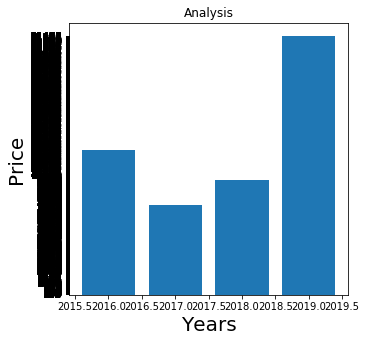

In [0]:
plt.figure(figsize=(5,5))
plt.xlabel('Years',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.title('Analysis')
plt.yticks(np.arange(mn,mx))
plt.bar(x['year'],data['Modal Price (Rs./Quintal)'], label="Example one")
plt.show()

In [0]:
#On Hot Encoding
x=pd.get_dummies(x)
var=pd.read_csv('/content/drive/My Drive/future11.csv')
var=pd.get_dummies(var)

In [0]:
#Feature Engineering
x=x.drop(['Price Date'], axis=1)
x['Difference']=x['Max Price (Rs./Quintal)']-x['Min Price (Rs./Quintal)']


In [0]:
#Split dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=0)

In [0]:
#Train Dataset
import xgboost
model = xgboost.XGBRegressor(               
                 learning_rate=0.07,
                 sourcemax_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[08:26:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

# New Section

# New Section

In [0]:
#Make Prediction
y_predict=model.predict(x_test)
accuracy = sklearn.metrics.r2_score(y_test, y_predict)
print(accuracy)

0.9796583016636686


In [0]:
y_test.head()

26063    1400
24937     700
20942    1000
37209    2050
22932    1630
Name: Modal Price (Rs./Quintal), dtype: int64

In [0]:
y_predict
pred=pd.DataFrame(y_predict)


In [0]:
#Predicting 2020 data
x_data=pd.read_csv('/content/drive/My Drive/Original.csv')
y_y_predict=model.predict(x_data)
x.head()

ValueError: ignored

In [0]:
x_20=pd.read_csv('/content/drive/My Drive/Original.csv')
yes=pd.read_csv('/content/drive/My Drive/Harsh2.csv')
feat=['year','month']
x_20=x_20[feat]
x_20['District Name']=yes['District Name']
x_20['Commodity']=yes['Commodity']
x_20['Predicted']=y_y_predict[:]
# x_20.to_csv('x_20.csv')

In [0]:
x_21=pd.read_csv('/content/drive/My Drive/Original.csv')
yes=pd.read_csv('/content/drive/My Drive/Harsh2.csv')
feat=['year','month']
x_21=x_21[feat]
x_21['District Name']=yes['District Name']
x_21['Commodity']=yes['Commodity']
x_21['Predicted']=y_y_predict21[:]
# x_21.to_csv('x_20.csv')

NameError: ignored

In [0]:
data_x=data[data['Commodity']=="Indore"]

In [0]:
data.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Lucknow,Banthara,Wheat,Dara,FAQ,1800,1850,1840,30 Sep 2019
1,2,Lucknow,Banthara,Wheat,Dara,FAQ,1800,1850,1840,29 Sep 2019
2,3,Lucknow,Banthara,Wheat,Dara,FAQ,1800,1850,1840,26 Sep 2019
3,4,Lucknow,Banthara,Wheat,Dara,FAQ,1800,1850,1840,25 Sep 2019
4,5,Lucknow,Banthara,Wheat,Dara,FAQ,1800,1850,1840,20 Sep 2019
